In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read MA PPE data
df = pd.read_csv('MA_ppe_regions.csv', parse_dates=['Time'])
df.drop(['Total Persons Tested','Percent Positivity','Deaths','Hospitalized Total', 'Hospitalized ICU'], axis=1, inplace=True)
df = df.loc[df['Region']!='State Agency'].dropna(how='all')
df

,Time,Region,N95s/KN95s,Masks,Gowns,Gloves,Ventilators,Confirmed Cases
0,2020-04-29,Central Massachusetts,138350.0,263767.0,43293.0,454250.0,79.0,5363.0
1,2020-04-30,Central Massachusetts,146820.0,269267.0,43573.0,457450.0,79.0,NaN
2,2020-05-01,Central Massachusetts,157800.0,276767.0,43838.0,472050.0,79.0,NaN
3,2020-05-02,Central Massachusetts,161960.0,277517.0,44658.0,480450.0,79.0,NaN
4,2020-05-03,Central Massachusetts,161960.0,277517.0,44658.0,480450.0,79.0,NaN
...,...,...,...,...,...,...,...,...
347,2020-08-12,Massachusetts,10476785.0,11665045.0,736612.0,10116833.0,679.0,113198.0
348,2020-08-19,Massachusetts,11161755.0,12488545.0,742512.0,10422377.0,679.0,115048.0
349,2020-08-26,Massachusetts,11192185.0,12525245.0,747887.0,10502349.0,679.0,117085.0
350,2020-09-02,Massachusetts,11194995.0,12544695.0,752587.0,10527949.0,679.0,119426.0


# Note:
## This notebook is generalized in three parts for each region to analyze PPE distribution vs confirmed cases.
### 1: Figures of absolue value of cumulative PPE data vs cumulative confirmed cases data. 
### 2: Figures of ratios of PPE data to confirmed cases. (See comments for 6 different ratios)
### 3: Figures of regression and results.


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Summary
### 1: This data set is from DPH and MEMA. The PPEs are distributed to those who will have a supply shortage within the next 5 days and are not able to sourcethe material through their normal supply chain. This data set may not show the entire pucture of PPE supply in Mass.
### 2: At first, Feds gave Mass. the least amount of PPE but sent large shipments to states with smaller population and far few cases. (https://www.wbur.org/news/2020/07/23/fema-masks-ppe-massachusetts-coronavirus)
### 3: There is a huge increase on July 22 for N95s/KN95s which may be caused by large supplys from FEMA.(Not sure) 
### 4: For the same ppe, it has similar distribution trend in different regions while different ppes have different trends in the same region. 
### 5: There is a linear relationship between cumulative gowns/gloves and cumulative confirmed cases based on the data we have. If we ignore the data from 7/22/2020, the relationship also exists between cumulative N95s/KN95s/Masks and cumulative confirmed cases. 
...


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# PPE Distribution vs Confirmed Cases
## Southeastern Massachusetts

,Time,Region,N95s/KN95s,Masks,Gowns,Gloves,Ventilators,Confirmed Cases,N95s/KN95s %,Masks %,Gowns %,Gloves %,Ventilators %
176,2020-04-29,Southeastern Massachusetts,234696.000,408835.0,66317.0,686220.0,79.0,9446.0,17.127662,21.662026,42.409224,40.099902,100.0
183,2020-05-06,Southeastern Massachusetts,271607.000,494885.0,80542.0,853420.0,79.0,11616.0,19.821356,26.221365,51.506005,49.870389,100.0
190,2020-05-13,Southeastern Massachusetts,294853.000,579135.0,93570.0,1020308.0,79.0,13243.0,21.517804,30.685331,59.837313,59.622644,100.0
197,2020-05-20,Southeastern Massachusetts,306789.000,610735.0,101149.0,1111008.0,79.0,14953.0,22.388871,32.359650,64.684027,64.922783,100.0
204,2020-05-27,Southeastern Massachusetts,354094.000,643835.0,121174.0,1198208.0,79.0,16026.0,25.841098,34.113446,77.489864,70.018396,100.0
205,2020-06-03,Southeastern Massachusetts,371135.000,674335.0,127784.0,1338408.0,79.0,16832.0,27.084718,35.729481,81.716909,78.211113,100.0
206,2020-06-10,Southeastern Massachusetts,377062.000,691835.0,131684.0,1369208.0,79.0,17297.0,27.517259,36.656714,84.210930,80.010939,100.0
207,2020-06-17,Southeastern Massachusetts,378627.000,697785.0,134614.0,1370008.0,79.0,17597.0,27.631469,36.971974,86.084643,80.057688,100.0
208,2020-06-24,Southeastern Massachusetts,381785.000,705885.0,138104.0,1436408.0,79.0,17770.0,27.861934,37.401150,88.316472,83.937834,100.0
209,2020-07-01,Southeastern Massachusetts,383545.000,705885.0,139104.0,1453608.0,79.0,17965.0,27.990376,37.401150,88.955965,84.942931,100.0


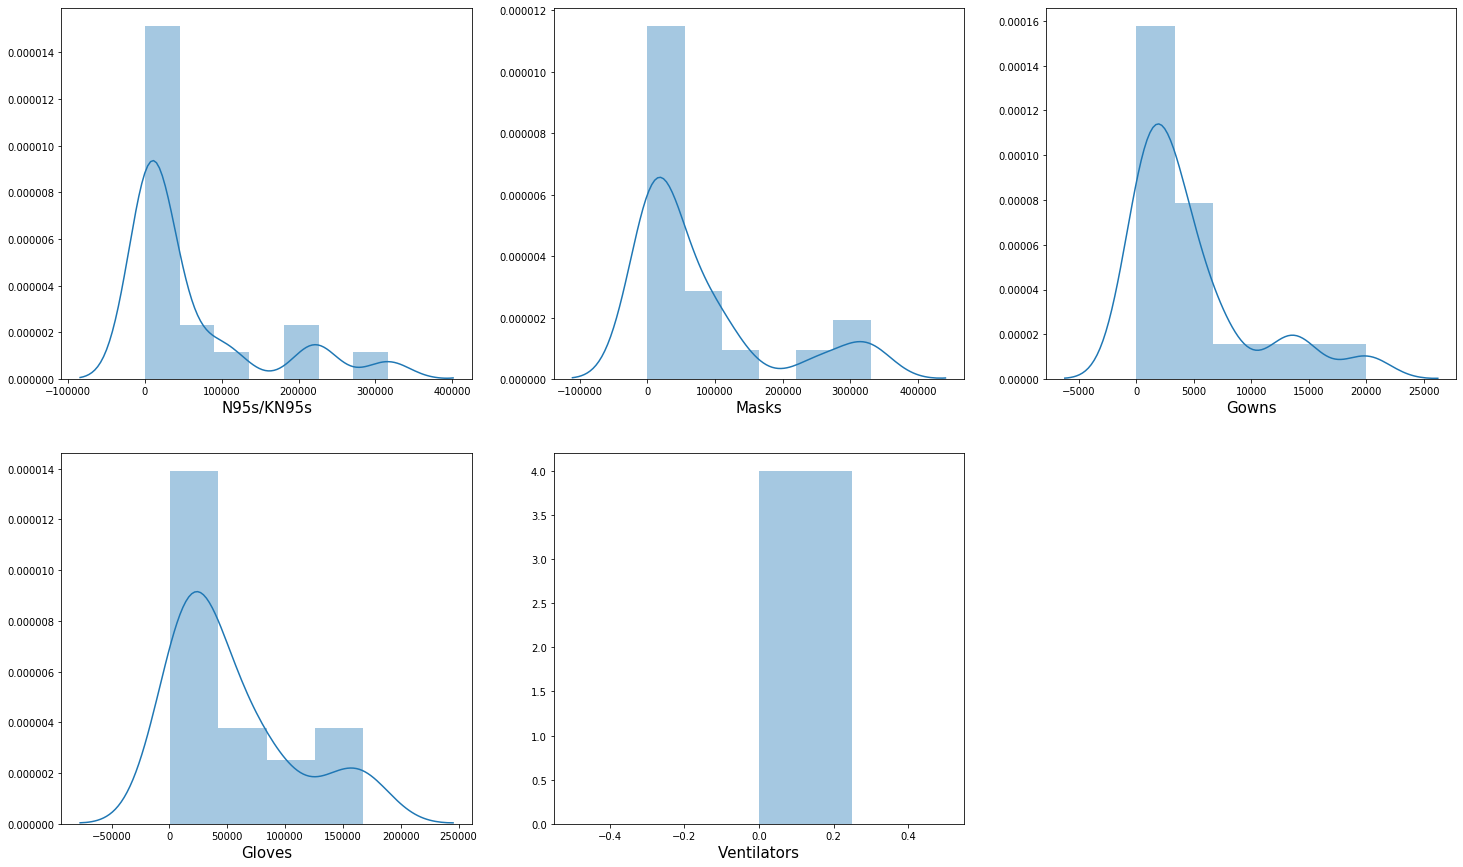

In [3]:
SM = df.loc[df['Region']=='Southeastern Massachusetts']
SM_CC = SM.dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    SM_CC['{} %'.format(category)] = SM_CC[category]/SM_CC[category].iloc[-1] * 100
    
fig, axes = plt.subplots(2, 3, figsize=(25,15))
for ax, category in zip(axes.flatten(), categories):
    sns.distplot(SM_CC[category].diff(), ax=ax)
    ax.set_xlabel(category, fontsize=15)
fig.delaxes(axes[1,2])
SM_CC

Distplot of PPE Growth

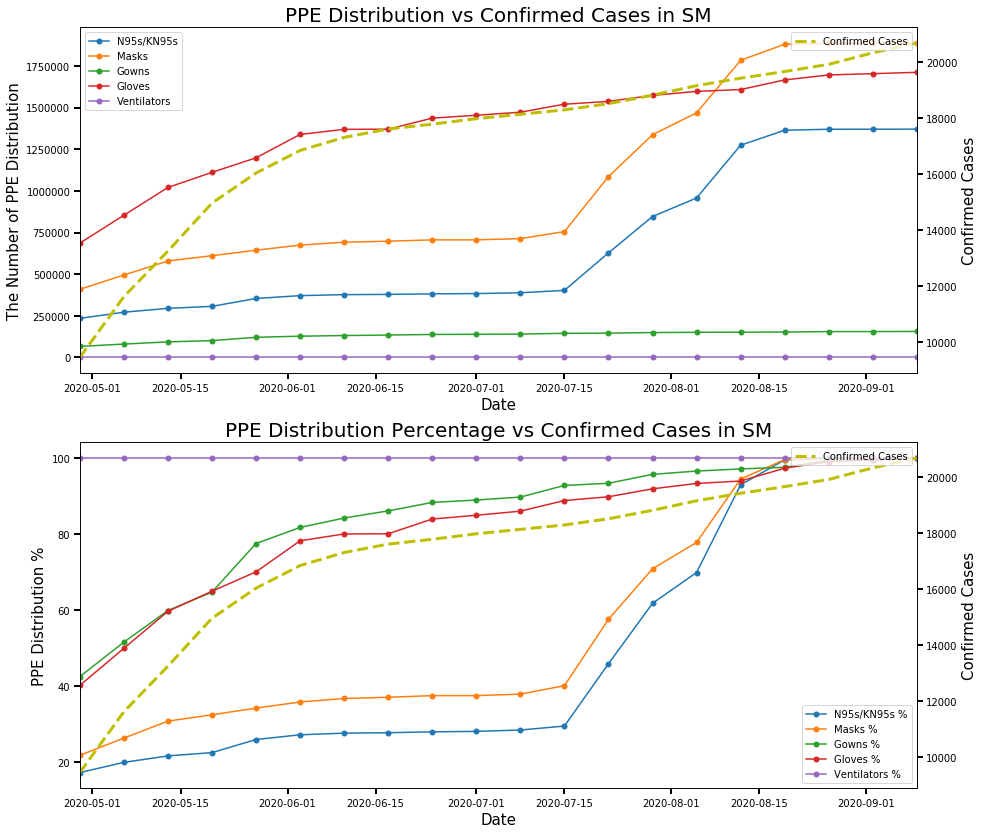

In [4]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=SM_CC, marker='.', markersize=10)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 9,9)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in SM', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=SM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=SM_CC, marker='.', markersize=10)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 9,9)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in SM', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=SM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    SM_CC['{} Ratio 1'.format(category)] = SM_CC[category]/SM_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
SM_CC['Confirmed Cases(ma1)'] = SM_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
SM_CC.iloc[0,-1] = (6065 + 9446) / 2
for category in categories:
    SM_CC['{} Ratio 2'.format(category)] = SM_CC[category]/SM_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
SM_CC['Confirmed Cases(ma2)'] = SM_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    SM_CC['{} Ratio 3'.format(category)] = SM_CC[category]/SM_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
SM_CC['Confirmed Cases(ma3)'] = SM_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
SM_CC.iloc[0,-1] = (6065+9446+11616)/3
for category in categories:
    SM_CC['{} Ratio 4'.format(category)] = SM_CC[category]/SM_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    SM_CC['{} Ratio 5'.format(category)] = SM_CC[category].diff()/SM_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    SM_CC['{} Ratio 6'.format(category)] = SM_CC[category].diff()/SM_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
# SM_CC

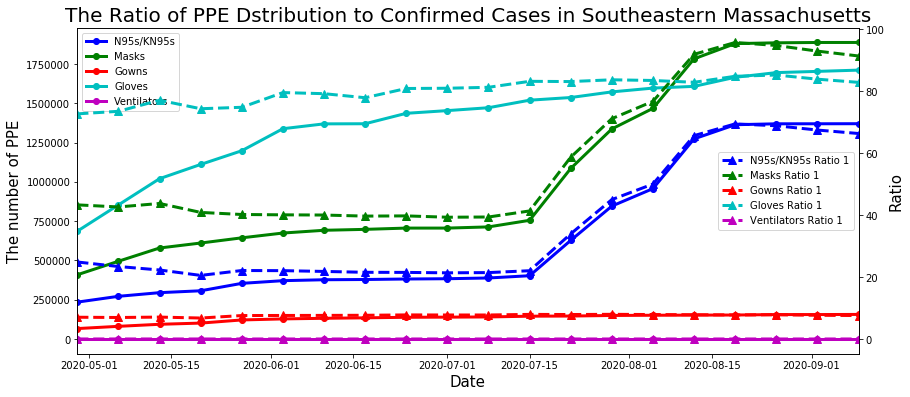

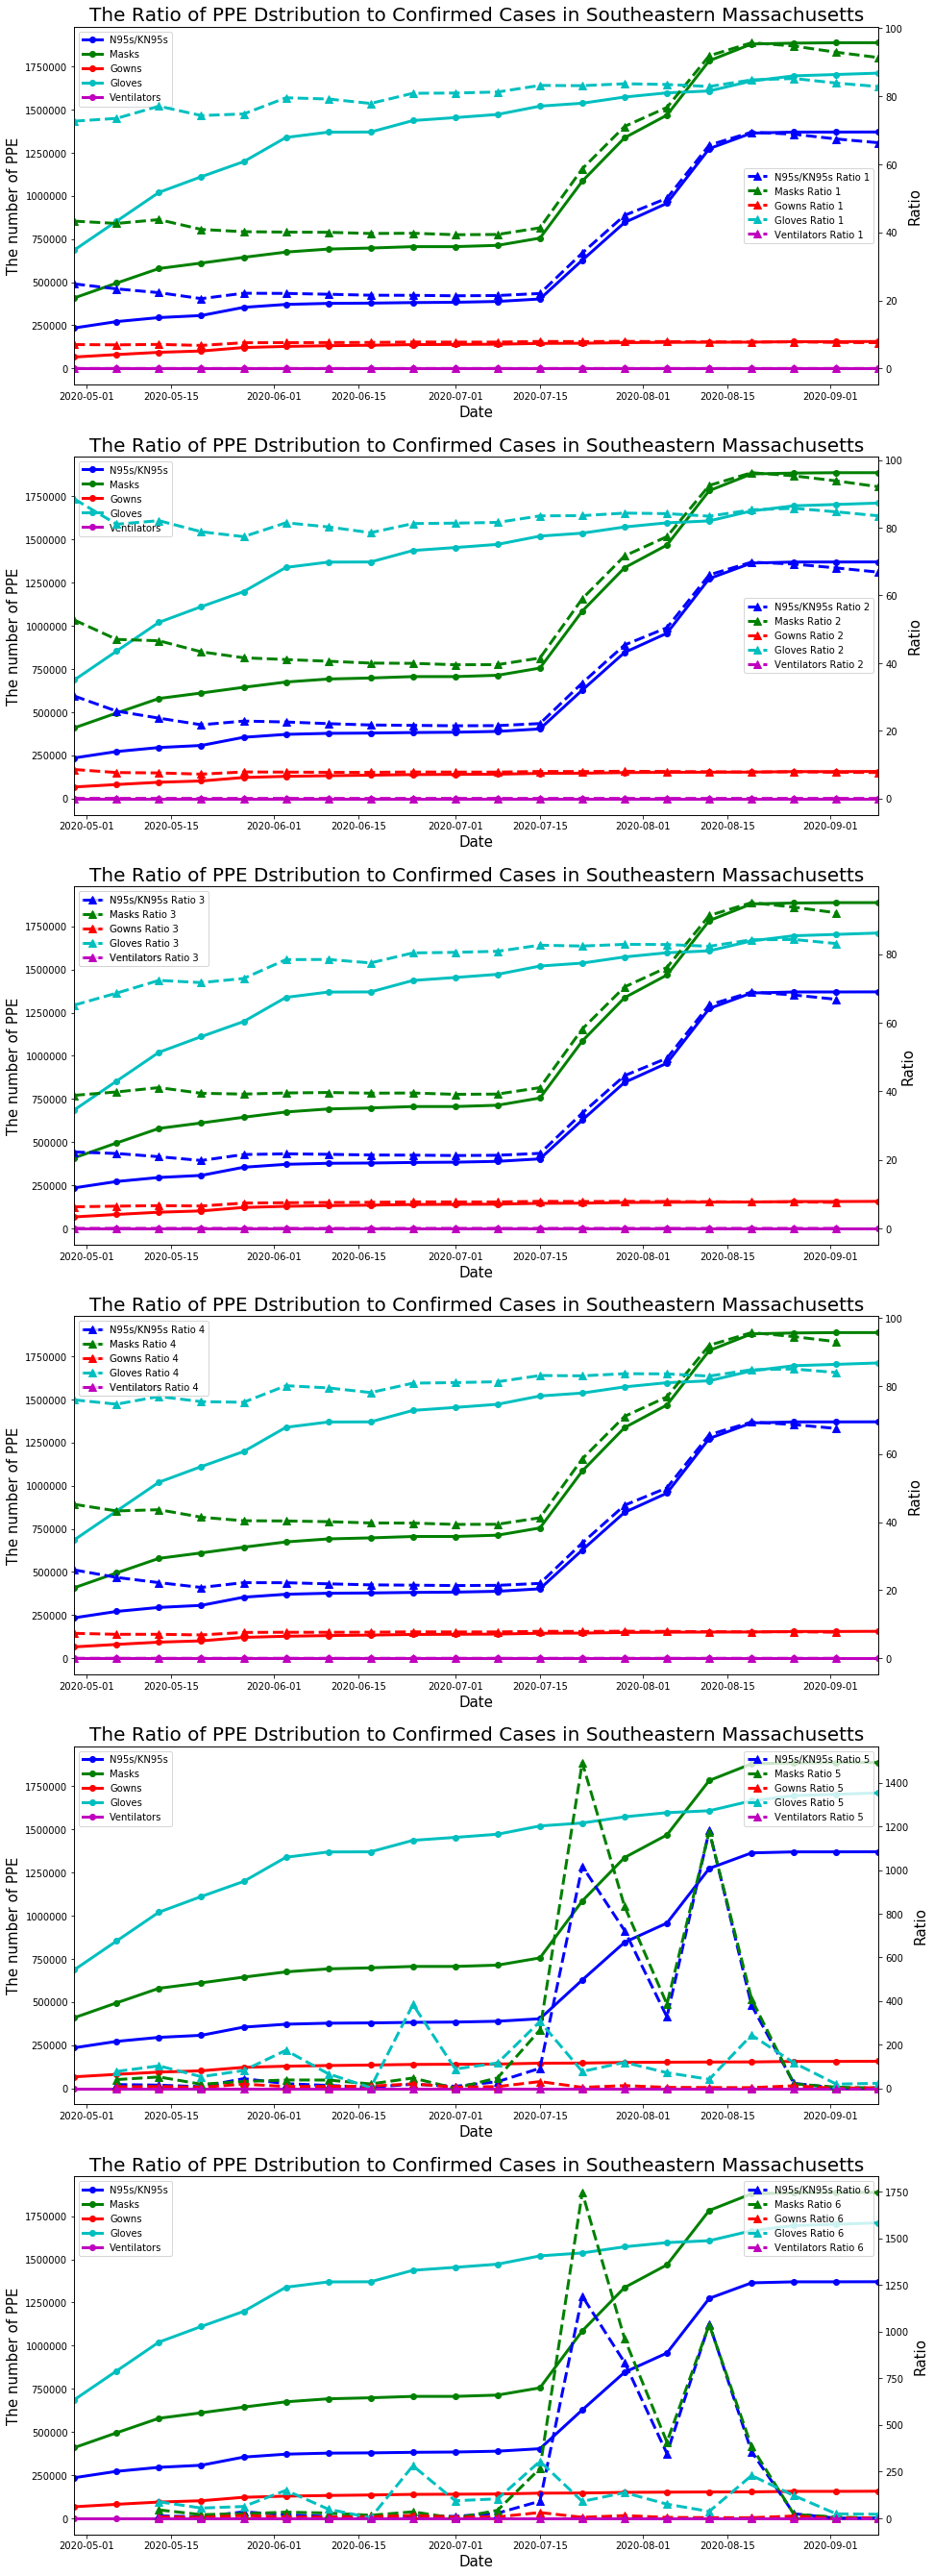

In [6]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))

fig, ax = plt.subplots(1,1,figsize=(14, 6))
color = ['b', 'g', 'r', 'c', 'm']

for category in categories:
    ax.plot('Time', category, data=SM_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
    ax.set_xlabel('Date', fontsize=15)
    ax.set_ylabel('The number of PPE', fontsize=15)
    ax.set_xlim([datetime.date(2020, 4, 29), datetime.date(2020, 9,9)])
    ax.legend(loc='best')
    ax.set_title('The Ratio of PPE Dstribution to Confirmed Cases in Southeastern Massachusetts', fontsize=20)
ax1 = ax.twinx()
for ratio in RATIO1:
    ax1.plot('Time', ratio, data=SM_CC, color=color[RATIO1.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
    ax1.set_ylabel('Ratio', fontsize=15)
    ax1.legend(loc='best')
plt.show()

         
         
fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']

for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=SM_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Southeastern Massachusetts', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=SM_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot(delta vs delta)')

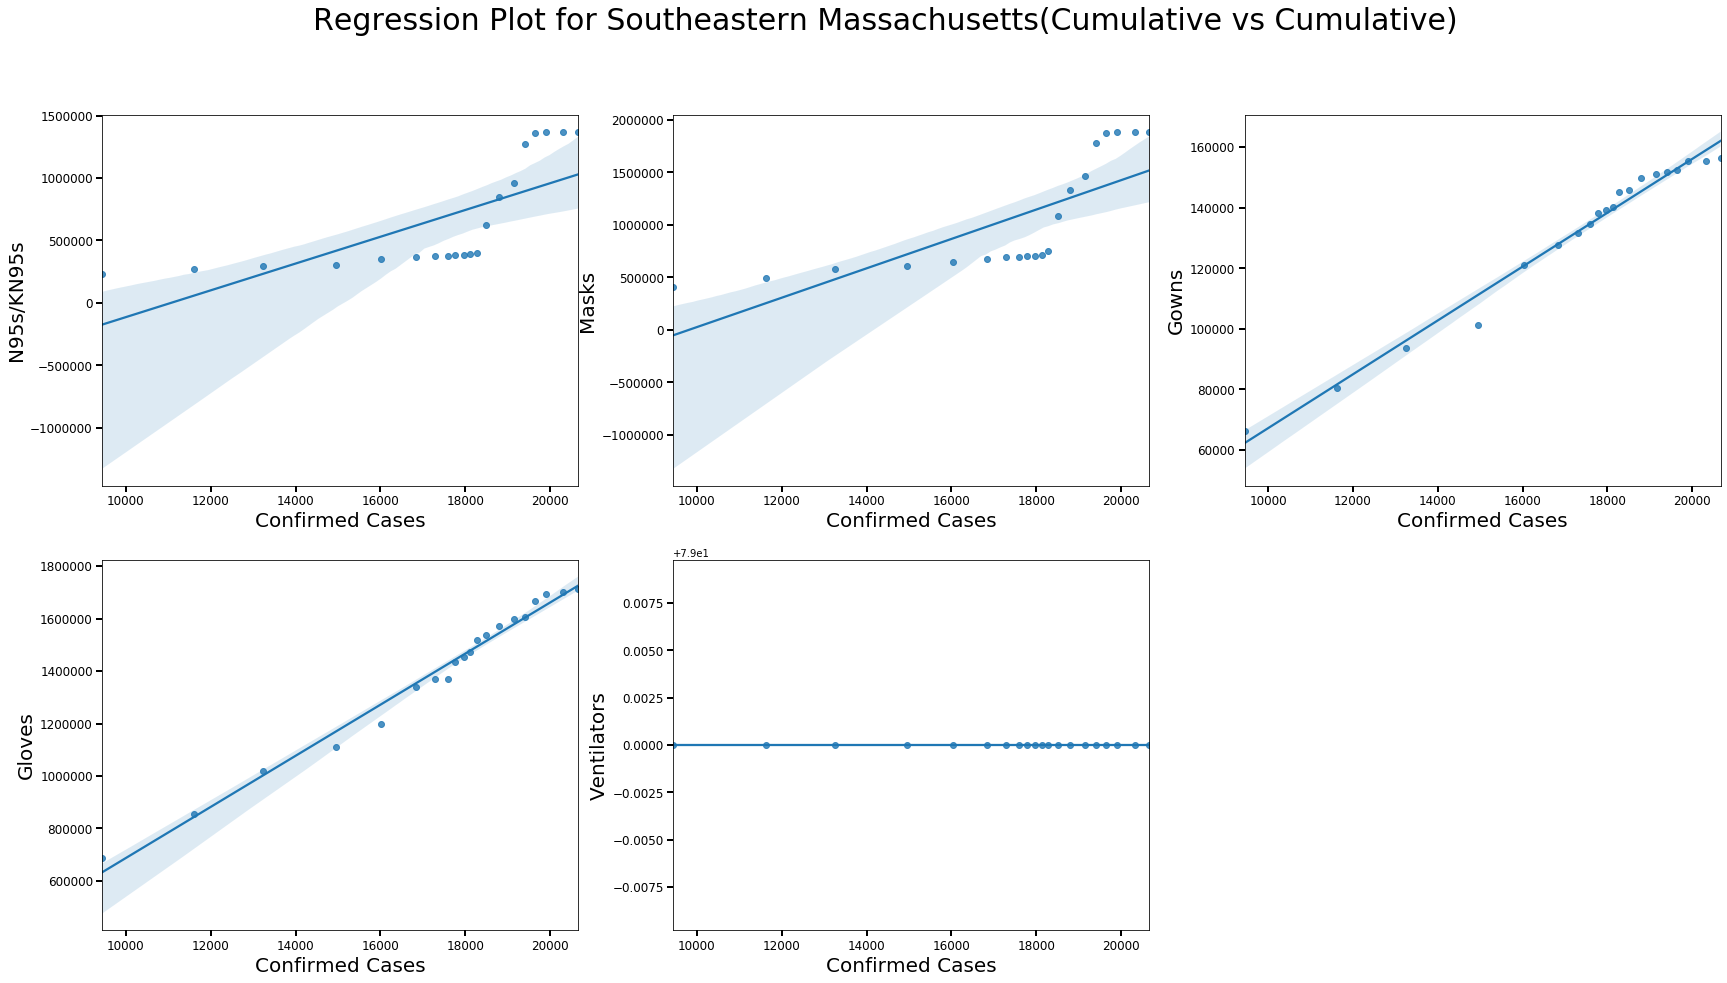

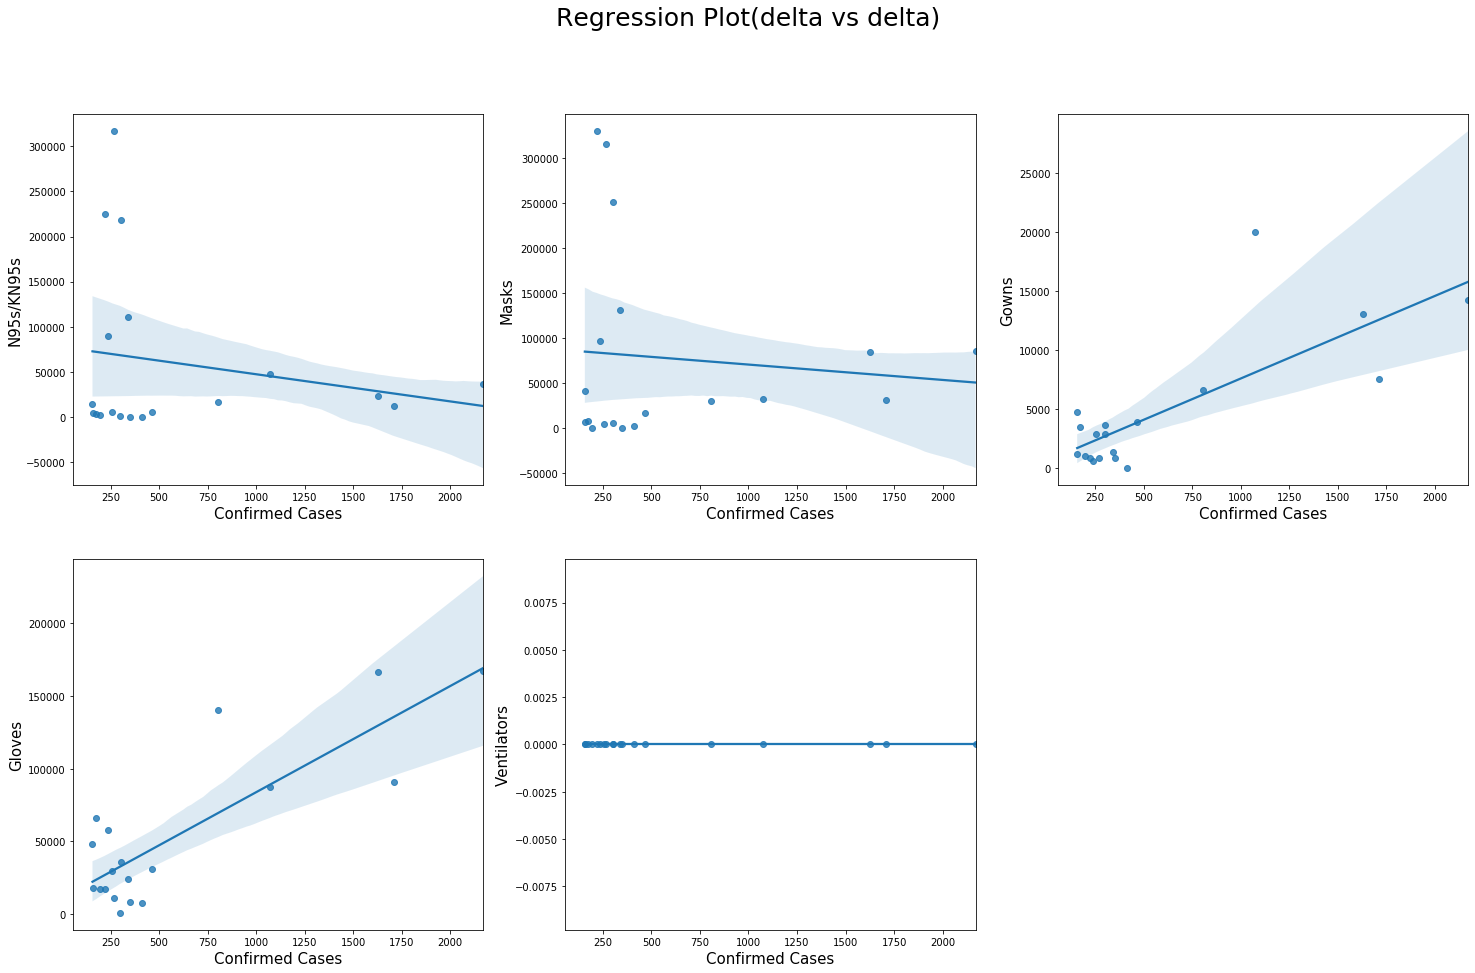

In [7]:
for category in categories:
    SM_CC['{} delta'.format(category)] = SM_CC[category].diff()
    SM_CC['Confirmed Cases delta'] = SM_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(29,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=SM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=20)
    ax.set_ylabel(category, fontsize=20)
    ax.tick_params(direction='out', length=6, width=2, labelsize=12)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot for Southeastern Massachusetts(Cumulative vs Cumulative)', fontsize=30)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=SM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot(delta vs delta)', fontsize=25)



In [8]:
# Regression Analysis
import statsmodels.api as sm

Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = SM_CC[category]
    X[categories.index(category)] = SM_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     18.51
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           0.000429
Time:                        20:58:00   Log-Likelihood:                -280.81
No. Observations:                  20   AIC:                             565.6
Df Residuals:                      18   BIC:                             567.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.186e+06   4.36e+05     


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Northeastern Massachusetts
### Northeastern Massachusetts is the region with the most confirmed cases number.

,Time,Region,N95s/KN95s,Masks,Gowns,Gloves,Ventilators,Confirmed Cases,N95s/KN95s %,Masks %,Gowns %,Gloves %,Ventilators %
132,2020-04-29,Northeastern Massachusetts,113720.000,226198.0,22974.0,335932.0,117.0,14920.0,8.791882,13.718007,40.468557,42.851093,100.0
139,2020-05-06,Northeastern Massachusetts,144600.000,260413.0,27849.0,427832.0,117.0,18056.0,11.179266,15.793010,49.055839,54.573749,100.0
146,2020-05-13,Northeastern Massachusetts,158983.000,297113.0,32024.0,514032.0,117.0,20158.0,12.291240,18.018719,56.410076,65.569321,100.0
153,2020-05-20,Northeastern Massachusetts,164193.000,320263.0,35174.0,559032.0,117.0,22088.0,12.694034,19.422674,61.958781,71.309468,100.0
160,2020-05-27,Northeastern Massachusetts,186775.000,339663.0,40604.0,614332.0,117.0,23370.0,14.439885,20.599207,71.523692,78.363471,100.0
161,2020-06-03,Northeastern Massachusetts,193712.000,366013.0,42635.0,688832.0,117.0,24334.0,14.976196,22.197229,75.101286,87.866604,100.0
162,2020-06-10,Northeastern Massachusetts,196071.000,375913.0,46315.0,700832.0,117.0,25003.0,15.158575,22.797625,81.583583,89.397310,100.0
163,2020-06-17,Northeastern Massachusetts,198897.000,385913.0,49195.0,703632.0,117.0,25424.0,15.377057,23.404085,86.656685,89.754475,100.0
164,2020-06-24,Northeastern Massachusetts,200936.000,390163.0,50520.0,726632.0,117.0,25734.0,15.534696,23.661831,88.990664,92.688328,100.0
165,2020-07-01,Northeastern Massachusetts,201506.000,391063.0,50870.0,730632.0,117.0,26022.0,15.578764,23.716412,89.607187,93.198563,100.0


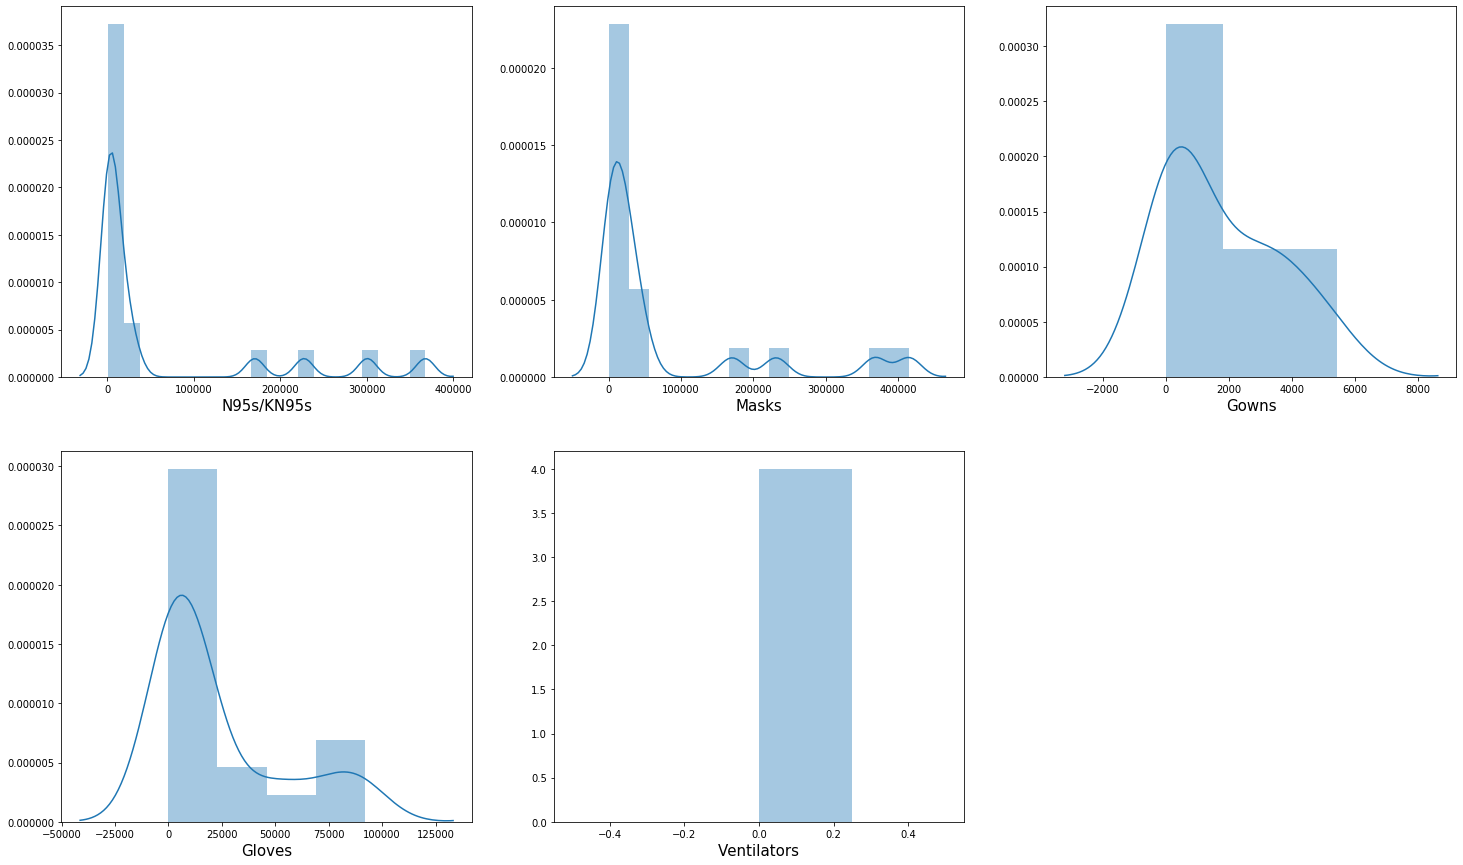

In [9]:
NM = df.loc[df['Region']=='Northeastern Massachusetts']
NM_CC = NM.dropna()
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
for category in categories:
    NM_CC['{} %'.format(category)] = NM_CC[category]/NM_CC[category].iloc[-1] * 100
    
fig, axes = plt.subplots(2, 3, figsize=(25,15))
for ax, category in zip(axes.flatten(), categories):
    sns.distplot(NM_CC[category].diff(), ax=ax)
    ax.set_xlabel(category, fontsize=15)
fig.delaxes(axes[1,2])
NM_CC

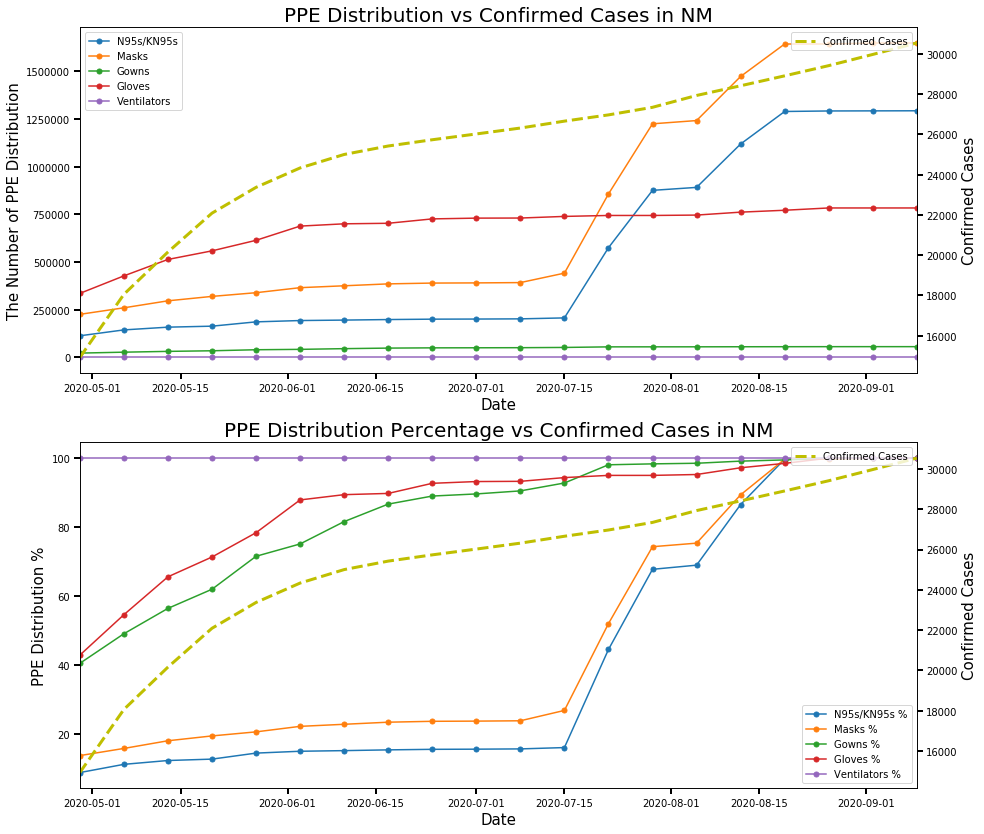

In [10]:
# Confirmed cases vs PPE distribution
fig, axes = plt.subplots(2,1,figsize=(15,14))

percentages = ['N95s/KN95s %', 'Masks %', 'Gowns %', 'Gloves %', 'Ventilators %']

for category in categories:
    axes[0].plot('Time', category, data=NM_CC, marker='.', markersize=10)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('The Number of PPE Distribution', fontsize=15)
axes[0].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
axes[0].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[0].legend()
axes[0].set_title('PPE Distribution vs Confirmed Cases in NM', fontsize=20)

ax1 = axes[0].twinx()
ax1.plot('Time', 'Confirmed Cases', data=NM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax1.set_ylabel('Confirmed Cases', fontsize=15)
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend(loc='upper right')


for percentage in percentages:
    axes[1].plot('Time', percentage, data=NM_CC, marker='.', markersize=10)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('PPE Distribution %', fontsize=15)
axes[1].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
axes[1].tick_params(direction='out', length=6, width=2, labelsize=10)
axes[1].legend()
axes[1].set_title('PPE Distribution Percentage vs Confirmed Cases in NM', fontsize=20)

ax2 = axes[1].twinx()
ax2.plot('Time', 'Confirmed Cases', data=NM_CC, color='y', linestyle='--', linewidth=3, label='Confirmed Cases')

ax2.set_ylabel('Confirmed Cases', fontsize=15)
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend(loc='upper right')

plt.show()

In [11]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


# Calculate the ratio of cumulative PPE data to cumulative confirmed cases data (Ratio 1)
for category in categories:
    NM_CC['{} Ratio 1'.format(category)] = NM_CC[category]/NM_CC['Confirmed Cases']
    
    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 2)
# (Interval=2 weeks, one week before + the week itself)
NM_CC['Confirmed Cases(ma1)'] = NM_CC['Confirmed Cases'].rolling(window=2,center=False).mean()
NM_CC.iloc[0,-1] = (10641+14920) / 2
for category in categories:
    NM_CC['{} Ratio 2'.format(category)] = NM_CC[category]/NM_CC['Confirmed Cases(ma1)']





# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 3)
# (Interval=2 weeks, one week after + the week itself)
NM_CC['Confirmed Cases(ma2)'] = NM_CC['Confirmed Cases'].rolling(window=2,center=False).mean().shift(-1)
for category in categories:
    NM_CC['{} Ratio 3'.format(category)] = NM_CC[category]/NM_CC['Confirmed Cases(ma2)']

    
    
# Calculate the ratio of cumulative PPE data to moving average of cumulative confirmed cases data (Ratio 4)
# (Interval=3 weeks, one week before + one week after + the week itself)
NM_CC['Confirmed Cases(ma3)'] = NM_CC['Confirmed Cases'].rolling(window=3,center=False).mean().shift(-1)
NM_CC.iloc[0,-1] = (10641+14920+18056)/3
for category in categories:
    NM_CC['{} Ratio 4'.format(category)] = NM_CC[category]/NM_CC['Confirmed Cases(ma3)']

    
    
# Calculate the ratio of delta PPE data to delta confirmed cases data (Ratio 5)
for category in categories:
    NM_CC['{} Ratio 5'.format(category)] = NM_CC[category].diff()/NM_CC['Confirmed Cases'].diff()
    
    
    
# Calculate the ratio of delta PPE data to moving average delta confirmed cases data (Ratio 6)
for category in categories:
    NM_CC['{} Ratio 6'.format(category)] = NM_CC[category].diff()/NM_CC['Confirmed Cases'].diff().rolling(window=2,center=False).mean()
NM_CC

,Time,Region,N95s/KN95s,Masks,Gowns,Gloves,Ventilators,Confirmed Cases,N95s/KN95s %,Masks %,Gowns %,Gloves %,Ventilators %,N95s/KN95s Ratio 1,Masks Ratio 1,Gowns Ratio 1,Gloves Ratio 1,Ventilators Ratio 1,Confirmed Cases(ma1),N95s/KN95s Ratio 2,Masks Ratio 2,Gowns Ratio 2,Gloves Ratio 2,Ventilators Ratio 2,Confirmed Cases(ma2),N95s/KN95s Ratio 3,Masks Ratio 3,Gowns Ratio 3,Gloves Ratio 3,Ventilators Ratio 3,Confirmed Cases(ma3),N95s/KN95s Ratio 4,Masks Ratio 4,Gowns Ratio 4,Gloves Ratio 4,Ventilators Ratio 4,N95s/KN95s Ratio 5,Masks Ratio 5,Gowns Ratio 5,Gloves Ratio 5,Ventilators Ratio 5,N95s/KN95s Ratio 6,Masks Ratio 6,Gowns Ratio 6,Gloves Ratio 6,Ventilators Ratio 6
132,2020-04-29,Northeastern Massachusetts,113720.000,226198.0,22974.0,335932.0,117.0,14920.0,8.791882,13.718007,40.468557,42.851093,100.0,7.621984,15.160724,1.539812,22.515550,0.007842,12780.5,8.897930,17.698682,1.797582,26.284731,0.009155,16488.0,6.897137,13.718947,1.393377,20.374333,0.007096,14539.000000,7.821721,15.558016,1.580164,23.105578,0.008047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,2020-05-06,Northeastern Massachusetts,144600.000,260413.0,27849.0,427832.0,117.0,18056.0,11.179266,15.793010,49.055839,54.573749,100.0,8.008418,14.422519,1.542368,23.694728,0.006480,16488.0,8.770015,15.794093,1.689047,25.948083,0.007096,19107.0,7.567907,13.629193,1.457529,22.391375,0.006123,17711.333333,8.164264,14.703184,1.572383,24.155832,0.006606,9.846939,10.910395,1.554528,29.304847,0.0,NaN,NaN,NaN,NaN,NaN
146,2020-05-13,Northeastern Massachusetts,158983.000,297113.0,32024.0,514032.0,117.0,20158.0,12.291240,18.018719,56.410076,65.569321,100.0,7.886844,14.739210,1.588650,25.500149,0.005804,19107.0,8.320668,15.549956,1.676035,26.902810,0.006123,21123.0,7.526535,14.065852,1.516073,24.335180,0.005539,20100.666667,7.909340,14.781251,1.593181,25.572883,0.005821,6.842531,17.459562,1.986204,41.008563,0.0,5.491791,14.012982,1.594120,32.913326,0.0
153,2020-05-20,Northeastern Massachusetts,164193.000,320263.0,35174.0,559032.0,117.0,22088.0,12.694034,19.422674,61.958781,71.309468,100.0,7.433584,14.499411,1.592448,25.309308,0.005297,21123.0,7.773186,15.161814,1.665199,26.465559,0.005539,22729.0,7.223943,14.090501,1.547538,24.595539,0.005148,21872.000000,7.506995,14.642602,1.608175,25.559254,0.005349,2.699482,11.994819,1.632124,23.316062,0.0,2.584325,11.483135,1.562500,22.321429,0.0
160,2020-05-27,Northeastern Massachusetts,186775.000,339663.0,40604.0,614332.0,117.0,23370.0,14.439885,20.599207,71.523692,78.363471,100.0,7.992084,14.534146,1.737441,26.287206,0.005006,22729.0,8.217475,14.944036,1.786440,27.028554,0.005148,23852.0,7.830580,14.240441,1.702331,25.755995,0.004905,23264.000000,8.028499,14.600370,1.745358,26.406981,0.005029,17.614665,15.132605,4.235569,43.135725,0.0,14.061021,12.079701,3.381071,34.433375,0.0
161,2020-06-03,Northeastern Massachusetts,193712.000,366013.0,42635.0,688832.0,117.0,24334.0,14.976196,22.197229,75.101286,87.866604,100.0,7.960549,15.041218,1.752075,28.307389,0.004808,23852.0,8.121415,15.345170,1.787481,28.879423,0.004905,24668.5,7.852606,14.837262,1.728317,27.923546,0.004743,24235.666667,7.992848,15.102246,1.759184,28.422243,0.004828,7.196058,27.334025,2.106846,77.282158,0.0,6.177204,23.463936,1.808549,66.340160,0.0
162,2020-06-10,Northeastern Massachusetts,196071.000,375913.0,46315.0,700832.0,117.0,25003.0,15.158575,22.797625,81.583583,89.397310,100.0,7.841899,15.034716,1.852378,28.029916,0.004679,24668.5,7.948234,15.238584,1.877496,28.409997,0.004743,25213.5,7.776429,14.909195,1.836913,27.795903,0.004640,24920.333333,7.867912,15.084590,1.858522,28.122898,0.004695,3.526158,14.798206,5.500747,17.937220,0.0,2.889161,12.124923,4.507042,14.696877,0.0
163,2020-06-17,Northeastern Massachusetts,198897.000,385913.0,49195.0,703632.0,117.0,25424.0,15.377057,23.404085,86.656685,89.754475,100.0,7.823199,15.179083,1.934983,27.675897,0.004602,25213.5,7.888512,15.305808,1.951137,27.906955,0.004640,25579.0,7.775793,15.087103,1.923257,27.508190,0.004574,25387.00000

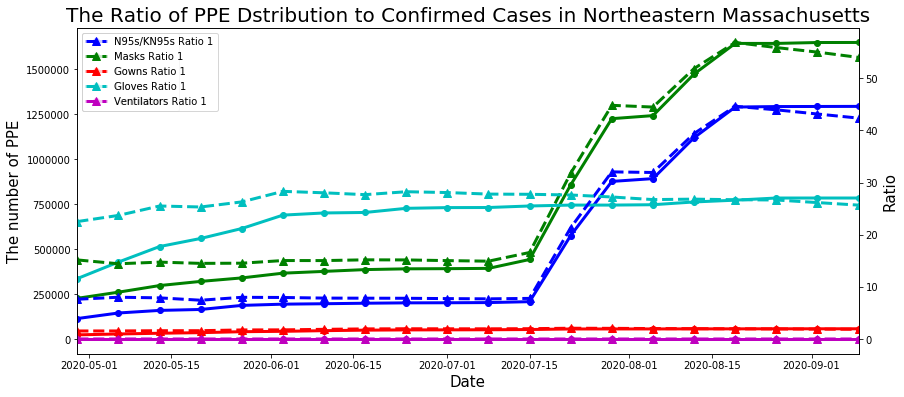

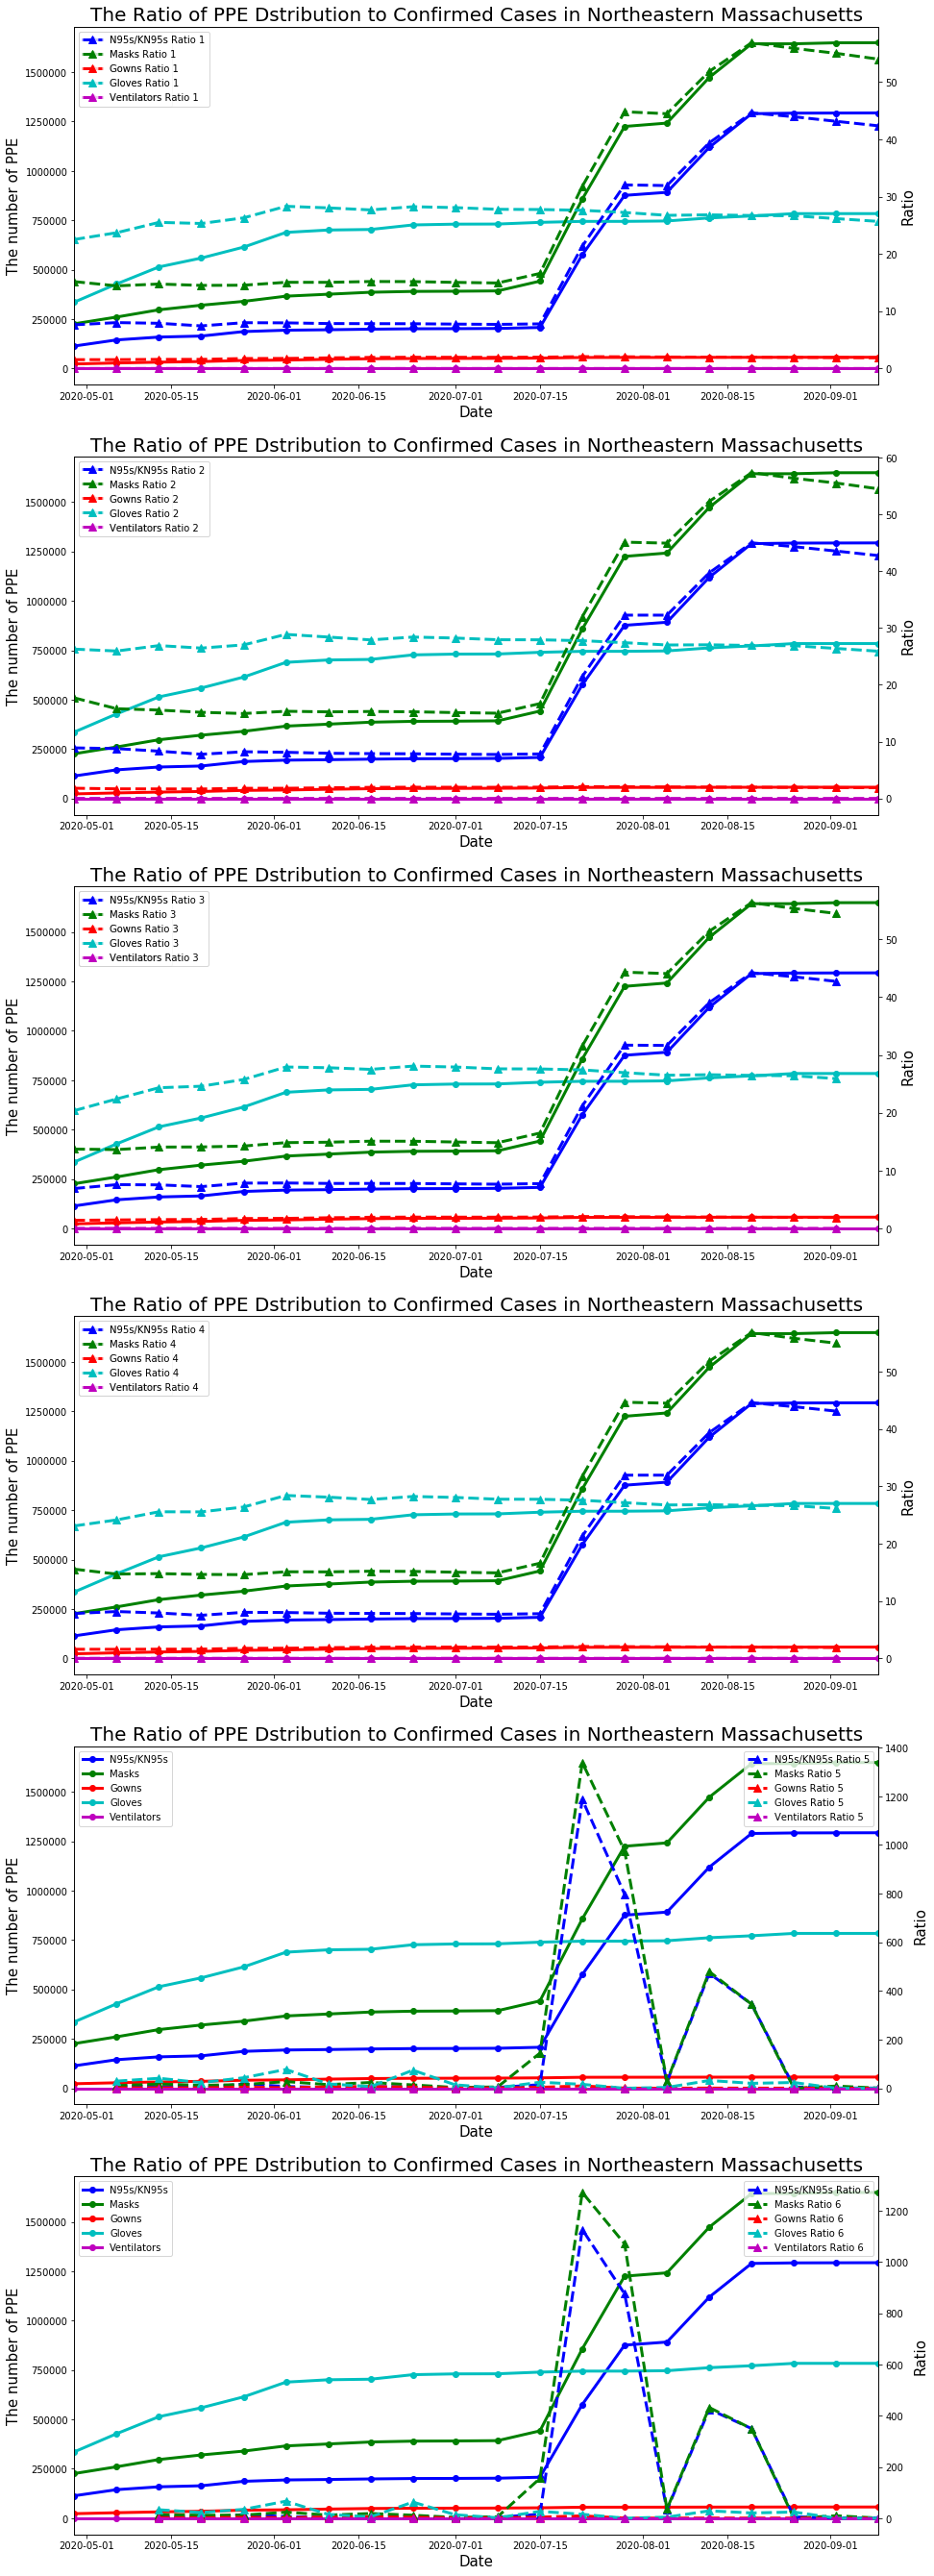

In [12]:
# Plot the Ratio of PPE to Confirmed Cases

RATIO1 = []
RATIO2 = []
RATIO3 = []
RATIO4 = []
RATIO5 = []
RATIO6 = []
RATIOS = [RATIO1, RATIO2, RATIO3, RATIO4, RATIO5, RATIO6]
for RATIO in RATIOS:
    for category in categories:
        RATIO.append('{} Ratio {}'.format(category, RATIOS.index(RATIO)+1))
        
fig, ax = plt.subplots(1,1,figsize=(14, 6))
color = ['b', 'g', 'r', 'c', 'm']

for category in categories:
    ax.plot('Time', category, data=NM_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
    ax.set_xlabel('Date', fontsize=15)
    ax.set_ylabel('The number of PPE', fontsize=15)
    ax.set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
    ax.legend(loc='best')
    ax.set_title('The Ratio of PPE Dstribution to Confirmed Cases in Northeastern Massachusetts', fontsize=20)
ax1 = ax.twinx()
for ratio in RATIO1:
    ax1.plot('Time', ratio, data=NM_CC, color=color[RATIO1.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
    ax1.set_ylabel('Ratio', fontsize=15)
    ax1.legend(loc='best')
plt.show()



fig, axes = plt.subplots(6,1,figsize=(15,48))
color = ['b', 'g', 'r', 'c', 'm']


for RATIO in RATIOS:
    for category in categories:
        axes[RATIOS.index(RATIO)].plot('Time', category, data=NM_CC, color=color[categories.index(category)], linewidth=3, label=category, marker='.', markersize=12)
        axes[RATIOS.index(RATIO)].set_xlabel('Date', fontsize=15)
        axes[RATIOS.index(RATIO)].set_ylabel('The number of PPE', fontsize=15)
        axes[RATIOS.index(RATIO)].set_xlim([datetime.date(2020, 4, 29), datetime.date(2020,9,9)])
        axes[RATIOS.index(RATIO)].legend(loc='best')
        axes[RATIOS.index(RATIO)].set_title('The Ratio of PPE Dstribution to Confirmed Cases in Northeastern Massachusetts', fontsize=20)
    ax1 = axes[RATIOS.index(RATIO)].twinx()
    for ratio in RATIO:
        ax1.plot('Time', ratio, data=NM_CC, color=color[RATIO.index(ratio)], linestyle='--', linewidth=3, label=ratio, marker='^', markersize=8)
        ax1.set_ylabel('Ratio', fontsize=15)
        ax1.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Regression Plot (Delta vs Delta)')

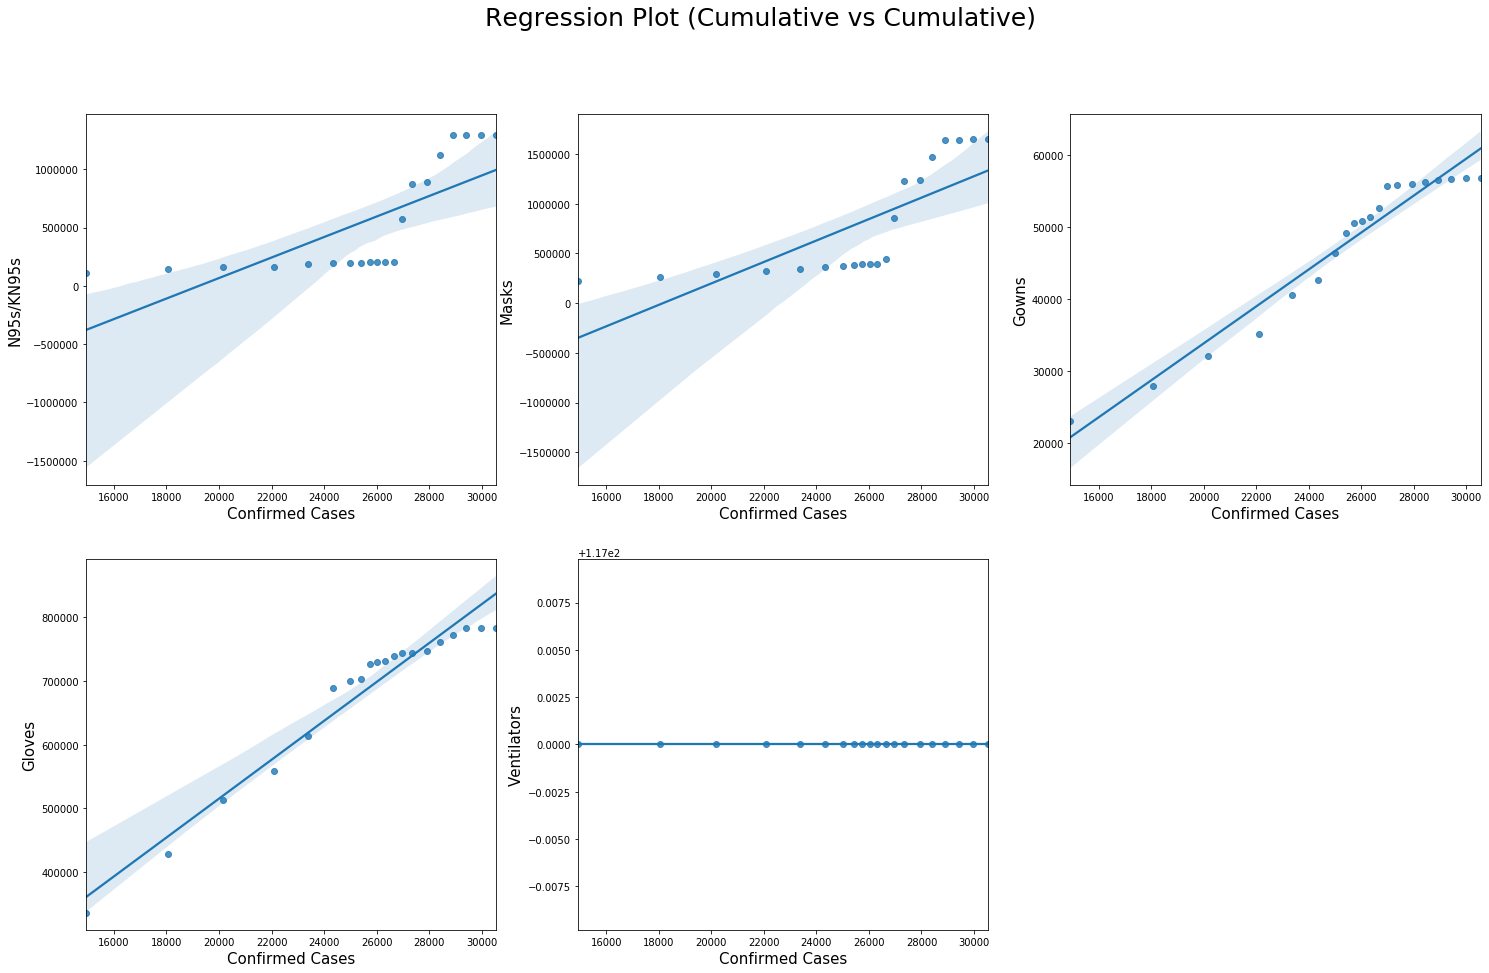

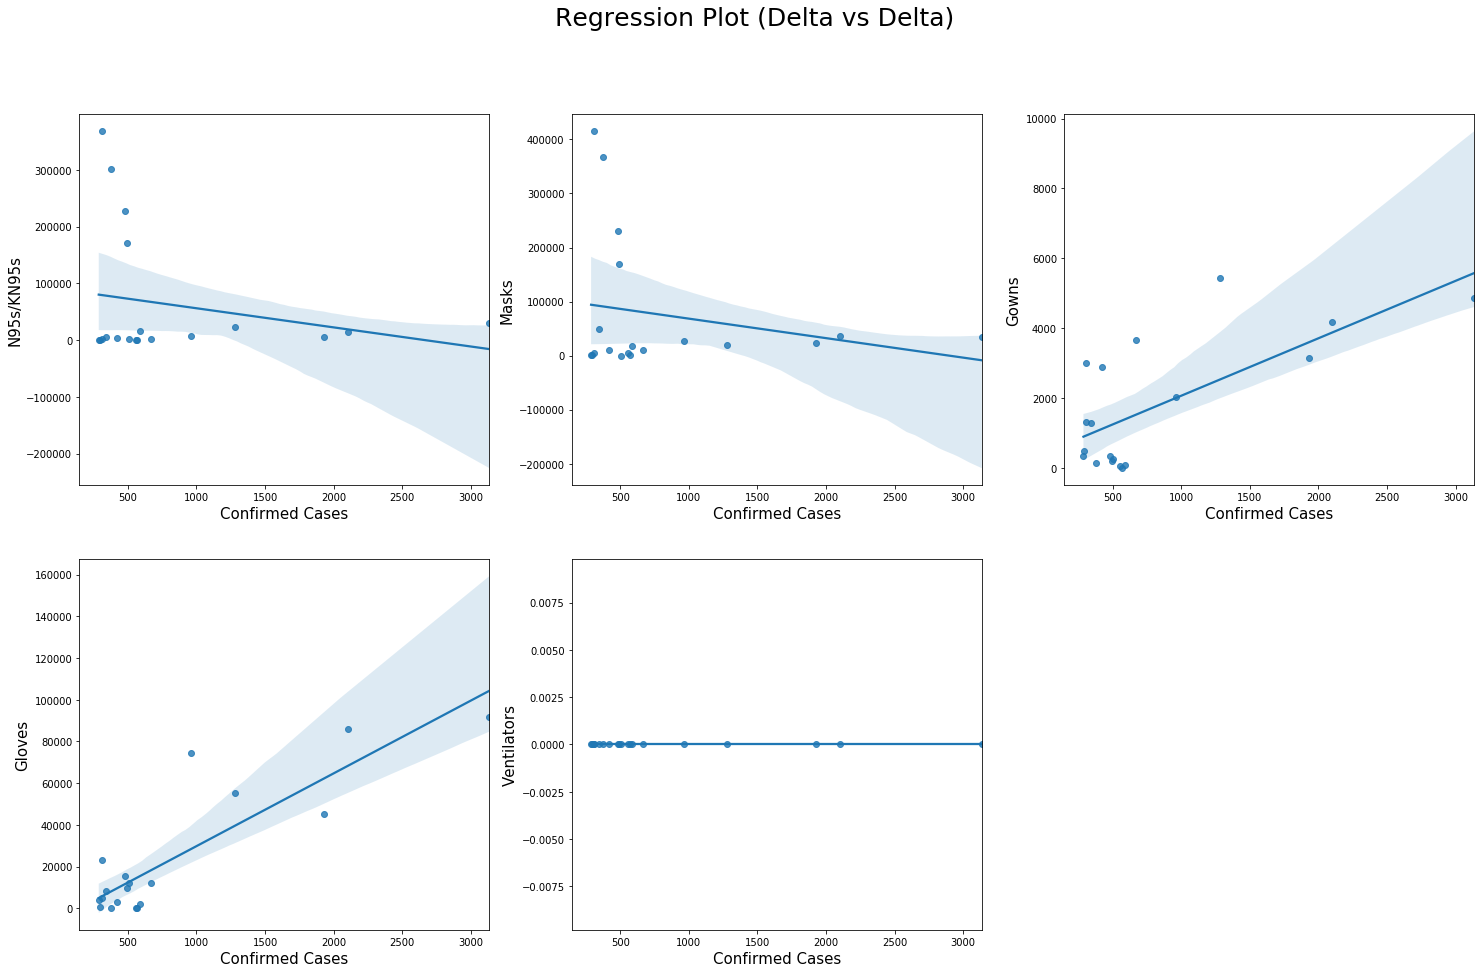

In [13]:
for category in categories:
    NM_CC['{} delta'.format(category)] = NM_CC[category].diff()
    NM_CC['Confirmed Cases delta'] = NM_CC['Confirmed Cases'].diff()

fig, axes = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes.flatten(), categories):
    sns.regplot('Confirmed Cases', category, data=NM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig.delaxes(axes[1,2])
fig.suptitle('Regression Plot (Cumulative vs Cumulative)', fontsize=25)

fig1, axes1 = plt.subplots(2, 3, figsize=(25,15))

for ax, category in zip(axes1.flatten(), categories):
    sns.regplot('Confirmed Cases delta', category + ' delta', data=NM_CC, ax=ax)
    ax.set_xlabel('Confirmed Cases', fontsize=15)
    ax.set_ylabel(category, fontsize=15)
fig1.delaxes(axes1[1,2])
fig1.suptitle('Regression Plot (Delta vs Delta)', fontsize=25)

In [14]:
import statsmodels.api as sm
Y = [pd.DataFrame] * 5
X = [pd.DataFrame] * 5
for category in categories:
    Y[categories.index(category)] = NM_CC[category]
    X[categories.index(category)] = NM_CC['Confirmed Cases']
    X[categories.index(category)] = sm.add_constant(X[categories.index(category)])
    model = sm.OLS(Y[categories.index(category)], X[categories.index(category)])
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             N95s/KN95s   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     21.32
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           0.000214
Time:                        20:58:07   Log-Likelihood:                -281.72
No. Observations:                  20   AIC:                             567.4
Df Residuals:                      18   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.692e+06   4.89e+05     